In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 
import skimage.io as ski

In [311]:
imagem = 'Questionario-3-Imagem-2.tif'

In [312]:
im = cv2.imread(imagem, cv2.IMREAD_GRAYSCALE)

assert im is not None

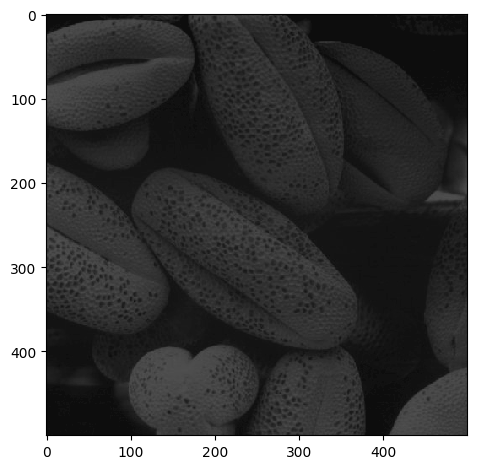

In [313]:
ski.imshow(im)

In [304]:
im.size

250000

In [314]:
valor, contagem = np.unique(im, return_counts=True)

In [315]:
hist = {j:contagem[i] for i,j in enumerate(valor)}  # compreensão de dicionario para coletar a intensidade (0-255) e a contagem de repetições
hist_cumulativo = {j: sum(contagem[0:i+1])/im.size for i,j in enumerate(valor)} # sum faz a contagem do histograma acumulado, /im1.size normaliza contagem (eixo y)

(0.0, 256.0)

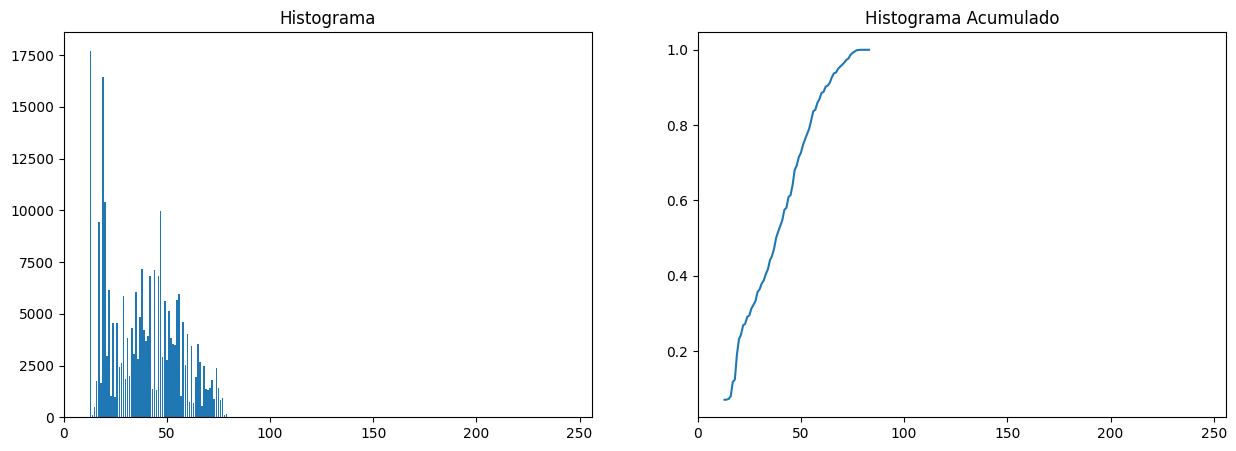

In [316]:
fig,ax = plt.subplots(1,2)
fig.set_figheight(5)
fig.set_figwidth(15)

ax[0].bar(hist.keys(), hist.values())
ax[0].set_title('Histograma')
ax[0].set_xlim([0,256])

ax[1].plot(hist_cumulativo.keys(), [i for i in hist_cumulativo.values()]) # plota o histograma acumulado (y é a frequencia normalizada)
ax[1].set_title('Histograma Acumulado')
ax[1].set_xlim([0,256])

In [317]:
# https://www.math.uci.edu/icamp/courses/math77c/demos/hist_eq.pdf

In [318]:
im_balanceada = np.copy(im)

In [319]:
for i,j in np.ndenumerate(im):  # mapeia a posição i,j da imagem original
    im_balanceada[i] = hist_cumulativo.get(j)  * 255  # atribui à cópia da imagem (im1_balanceada) a equalização de histograma T(x) = Intensidade (reta y=x))

im_balanceada.shape

(500, 500)

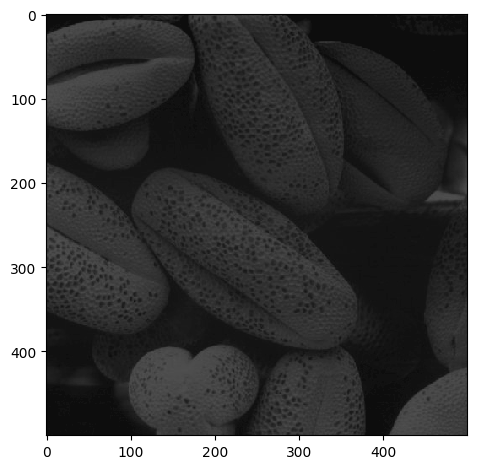

In [320]:
ski.imshow(im)  # imagem original

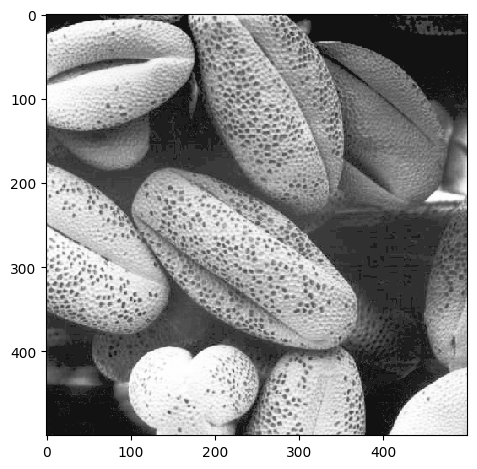

In [321]:
ski.imshow(im_balanceada)  # imagem balanceada manualmente

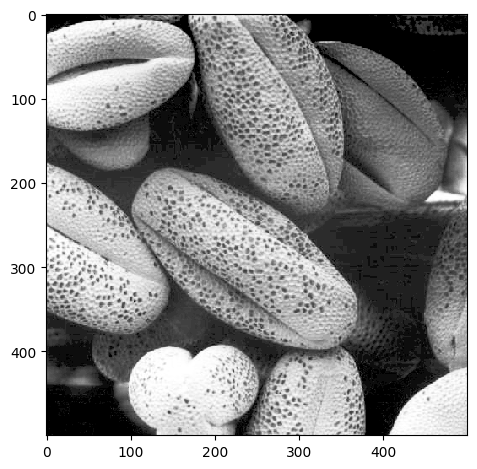

In [325]:
ski.imshow(cv2.equalizeHist(im))  # imagem balanceada com função

In [323]:
cv2.imwrite(f'{imagem}(Balanceada).png',im_balanceada)

True